# Probability

## Objectives

* Combinatorics, definitions and concepts
* Probability, definitions and concepts
* Major probability laws: Bayes Rule, Law of Total Probability, Chain Rule
* Random variables, definitions, and major formulas: Expectation, Variance, Correlation
* Major probability distributions
    * Discrete: Bernoulli, Binomial, Geometric, Poisson
    * Continuous: Uniform, Normal, Exponential

# Morning

## Sets

The range of all possible outcomes or events, also called the sample space.

* Coin flips
* Cookies
* Heights
* Number of slices of pizza eaten before 10 AM

### Symbology

* $\in$: in
* $\vee$ or
* $\wedge$ and
* $\neg$ not
* $\iff$ iff (if and only if)
* $\cap$ intersection
* $\cup$ union
* $|$ such that
* $\emptyset$ empty set
* $\forall$ for all
* $\therefore$ therefore

### Operations

* Union:
    * $A\cup B=\{x\ |\ x \in A \vee x \in B\}$
* Intersection:
    * $A \cap B=\{x\ |\ x \in A \wedge x \in B \}$
* Difference:
    * $A \setminus B=\{x\ |\ x \in A \wedge x \notin B \}$
* Complement:
    * $A^C=\{x\ |\ x \notin A \}$
* Disjoint:
    * $A \cap B=\emptyset$
* Partition $\{A_i\}$ (of S):
    * $A_i \cap A_j=\emptyset \forall i, j$
    * $S=\bigcup\limits_{i=l}^{N} A_{i}$

## DeMorgan's laws

* $\neg (A \vee B) \iff \neg A \wedge \neg B$
* $\neg (A \wedge B) \iff \neg A \vee \neg B$

## Combinatorics

The mathematics of ordering, choosing sets, etc. Useful for counting events in your sample space.

### Factorial

* $n!=\prod\limits_{i=1}^{n} i=1*2*3*\ \ldots\ *\ n-1\ *\ n$
* $0!=1$ by definition
* There are $n!$ ways to arrange $n$ objects into a sequence (where order matter)


* E.g., how many ways can we shuffle a deck of cards?

In [1]:
def fact(n):
    result = 1
    for i in xrange(1, n+1):
        result *= i
    return result

In [2]:
def fact(n):
    return reduce(lambda x, y: x*y, xrange(1, n+1))

In [3]:
fact(52)

80658175170943878571660636856403766975289505440883277824000000000000L

In [4]:
'{:e}'.format(fact(52))

'8.065818e+67'

### Permutations

* $P(n,k)=\frac{n!}{(n-k)!}$
* There are $P(n,k)$ ways to select $k$ out of $n$ objects into a sequence (where order maters)


* E.g., set batting order for 9 players on baseball team of 25

In [5]:
def perm(n, k):
    return fact(n)/fact(n-k)

In [6]:
perm(25, 9)

741354768000L

### Combinations

* $C(n,k)={{n}\choose{k}}={{n!}\over{(n-k)!k!}}$

In [7]:
def comb(n,k):
    return perm(n,k)/fact(k)

In [8]:
comb(25, 9)

2042975L

## Probability

For some sample space $S$, a probability function $P$ has three properties:

* $P(A)\ \ge\ 0 \ \forall \ A\ \in \ S$
* $P(S)=1$
* $\forall A_i, A_j : A_i \cap A_j=\emptyset \Rightarrow P(A_i \cup A_j)=P(A_i) + P(A_j)$

$\therefore$

* $P(A^C)=1-P(A)$
* $P(A \cup B)=P(A)+P(B)-P(A \cap B)$

### Independence

Events are independent (typically written $A \bot B$) if

$$P(A \cap B)=P(A)P(B)$$

Or, equivalently

$$P(A|B)=P(A)$$

The above is known as _conditional_ probability.

### Bringing it together

* We can reason about probabilities by carefully defining the sample space, and relevant subsets
* We can calculate probabilities by performing mathematical, often combinatoric, operations on these sets
* If you cannot properly determine the relevant space, it is not possible to define the probabilities

### Question

* Three coins are in a bag
    * One coin is normal and has head and tail (HT)
    * The other two are abnormal: one has two heads (HH), the other one two tails (TT)
* You draw a coin and flip it, getting heads
* What is the probability of getting heads on a second flip?

https://pollev.com/galvanizedsi351

### Solution

$P(X_2=H|X_1=H)=\frac{P(X_2=H \cap X_1=H)}{P(X_1=H)}$

* The probability of getting head on the first flip is

$P(X_1=H)=\frac{1}{3}\times \frac{1}{2} + \frac{1}{3}\times 1 + \frac{1}{3}\times 0=\frac{1}{2}$

* The probability of getting head on the first and second flip is

$P(X_1=H \cap X_2=H)=\frac{1}{3}\times \frac{1}{2} \times \frac{1}{2} + \frac{1}{3}\times 1 \times 1 + \frac{1}{3}\times 0 \times 0=\frac{5}{12}$

$P(X_2=H|X_1=H)=\frac{\frac{5}{12}}{\frac{1}{2}}=\frac{5}{6}$

In [9]:
5./6

0.8333333333333334

In [10]:
import random
import pandas as pd

coins = ['HT', 'HH', 'TT']

In [11]:
random.seed(5)

coin = random.choice(coins)

coin

'HH'

In [12]:
[random.choice(coin) for i in [1, 2]]

['H', 'H']

In [13]:
results = []
for i in xrange(1000000):
    coin = random.choice(coins)
    results.append([random.choice(coin) for i in [1, 2]])

df = pd.DataFrame(results, columns=['X1', 'X2'])

In [14]:
df.head()

,X1,X2
0,T,T
1,H,T
2,H,H
3,H,H
4,H,H


In [15]:
df = (df == 'H')

df.head()

,X1,X2
0,False,False
1,True,False
2,True,True
3,True,True
4,True,True


In [16]:
df.groupby('X1').mean()

,X2
X1,
False,0.166942
True,0.833058


## Question

What happens if the coins in the bag are {HT,HH}?

### Solution

$P(X_2=H|X_1=H)=\frac{P(X_2=H \cap X_1=H)}{P(X_1=H)}$

* The probability of getting head on the first flip is

$P(X_1=H)=\frac{1}{2}\times \frac{1}{2} + \frac{1}{2}\times 1=\frac{3}{4}$

* The probability of getting head on the first and second flip is

$P(X_1=H \cap X_2=H)=\frac{1}{2}\times \frac{1}{2} \times \frac{1}{2} + \frac{1}{2}\times 1 \times 1=\frac{5}{8}$

$P(X_2=H|X_1=H)=\frac{\frac{5}{8}}{\frac{3}{4}}=\frac{5}{6}$

In [17]:
5./6

0.8333333333333334

In [18]:
coins = ['HT', 'HH']

results = []
for i in xrange(1000000):
    coin = random.choice(coins)
    results.append([random.choice(coin) for i in [1, 2]])

df = pd.DataFrame(results, columns=['X1', 'X2'])
df = (df == 'H')
df.groupby('X1').mean()

,X2
X1,
False,0.499245
True,0.833678


## Probability Chain Rule

$P(X_1, X_2, X_3)=P(X_1|X_2, X_3)P(X_2|X_3)P(X_3)$

Under independence, $P(X_1|X_2, X_3)=P(X_1), P(X_2|X_3)=P(X_2)$

$\therefore $P(X_1, X_2, X_3)=P(X_1)P(X_2)P(X_3)$

More generally:

$P(\cap_{i}^nX_i)=\prod_i^n P(X_i | \cap_k^{i-1} X_k)$

## Law of Total Probability

If $\{B_n\}$ is a partition of a sample space $A$, meaning $\cup_i B_i=A$ and $B_i \cap B_j=\emptyset \forall i, j$

Then

$P(A)=\sum_i P(A\cap B_i)$

or

$P(A)=\sum_i P(A|B_i)P(B_i)$

And we call A the marginal distribution of B

## A Famous Rule and a Famously Counterintuitive Example

The Bayes Rule allows us to compute $P(B|A)$ using information about $P(A|B)$:

$$P(B|A)=\frac{P(A|B)P(B)}{P(A)}$$

### Example

|Conditional Events|Probability|
| --------- | ----------- |
| $P(+|doped)$ | .99 |
| $P(+|clean)$ | .05 |
| $P(doped)$ | .005 |

### Question

What is $P(doped|+)$?

### Solution

* $P(doped|+)=\frac{P(+|doped)P(doped)}{P(+)}$
* $P(+)=P(+|doped)P(doped)+P(+|clean)P(clean)$
* $P(clean)=1-P(doped)$


$\therefore$

$P(doped|+)=\frac{P(+|doped)P(doped)}{P(+|doped)P(doped)+P(+|clean)P(clean)}=\frac{.99*.005}{.99*.005+0.05*0.995}=.090$

### Probability overview

* Remember compliments $P(A^C)=1-P(A)$
* Are things independent?
* If conditional probabilites are involved, remember Bayes' rule
* Probabilites cannot be > 1, check if your reasoning leads to that happening
* The law of total probability is your friend

# Afternoon

## Random Variables

Random variables formalize a mapping we have been implicitly using already:

$X(s) : S\Rightarrow \Re$

* Capital letters refer to random variables.
* Lowercase to refer to specific realization.
* $P(X=x)=P(\{s\in S : X(s)=x\})$
* $X \sim XYZ(\alpha, \beta, ...)$ means $X$ is distributed as, dist with parameters $(\alpha, \beta, ...)$.
* "i.i.d."

## Cumulative distribution function

$F_X(x)=P(X < x)$

What kinds of bounds can we put on this function?

This works for both continuous and discrete functions

## Probability mass function, PMF

For discrete variables:

$f_X(x)=P(X=x),\forall x$

For continuous variables, think of it as the derivative of the CDF:

$f_X(x)dx=P(x<X<x+dx)=dF_X(x)$

$f_X(x)=\frac{dF_X(x)}{dx}$

## Expectation

Discrete:
$E[X]=\sum_{s\in S} X(s) f_X(s)$

Continuous:
$E[X]=\int_{-\infty}^{\infty}X(s) f_X(s)ds$

A measure, but not the only one, of the central tendency of a distribution. Alternatives?

Note, the sample mean is:

$\bar{x}=\frac{1}{n}\sum_j^n x_j$

## Variance

$Var[x]=E[(x - E[X])^2]$

What are the units?

Note, the sample variance is:

$s^2=\frac{1}{n-1}\sum_j^n (x_j-\bar{x})^2$

## Standard deviation

$\sigma(x)=\sqrt{Var[x]}$

Useful because its units are in units of our original random variable

## Covariance
We can also compute the covariance between two different variables:

$Cov[X,Y]=E[(x - E[X])(y - E[Y])]$

Which is related to the

## Correlation

$Corr[X,Y]=\frac{Cov[X,Y]}{\sigma(X)\sigma(Y)}$

## Marginal Distributions

Marginal distribution takes a--possibly not independent--multivariate distribution and considers only a single dimension

Accomplished by summing (discrete) or integrating (continuous)

$$f_X(x)=\int_{-\infty}^\infty f_{XY}(x,s) ds$$

E.g.,

![](https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png)

Discrete case:

||x1|x2|x3|x4|py(Y)|
|---|---|---|---|---|
|y1|$\frac{4}{32}$|$\frac{2}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$|
|y2|$\frac{2}{32}$|$\frac{4}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$|
|y3|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{8}{32}$|
|y4|$\frac{8}{32}$|0|0|0|$\frac{8}{32}$|
|px(X)|?|?|?|?|?|

## Conditional Distributions

$$f(y|x)=\frac{f_{XY}(x,y)}{f_X(x)}$$

## Anscombe's quartet

Populating the interactive namespace from numpy and matplotlib


/Users/ivan/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


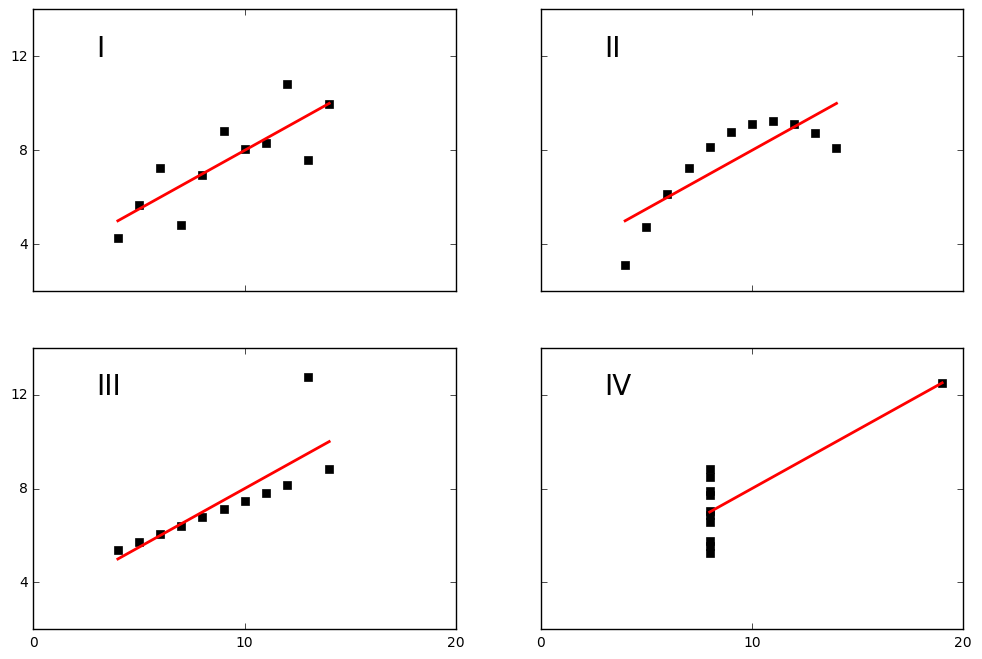

In [19]:
from numpy import array, amin, amax
%pylab inline


def fit(x):
    return 3+0.5*x

def anscombe():
    x =  array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
    y1 = array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
    y2 = array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
    y3 = array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
    x4 = array([8,8,8,8,8,8,8,19,8,8,8])
    y4 = array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

    xfit = array( [amin(x), amax(x) ] )
    figure(figsize(12,8))
    subplot(221)
    plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), xticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    text(3,12, 'I', fontsize=20)

    subplot(222)
    plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), xticklabels=[], yticks=(4,8,12), yticklabels=[], xticks=(0,10,20))
    text(3,12, 'II', fontsize=20)

    subplot(223)
    plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    text(3,12, 'III', fontsize=20)
    setp(gca(), yticks=(4,8,12), xticks=(0,10,20))

    subplot(224)

    xfit = array([amin(x4),amax(x4)])
    plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
    axis([2,20,2,14])
    setp(gca(), yticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    text(3,12, 'IV', fontsize=20)

    pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
    for x,y in pairs:
        print ('mean=%1.2f, std=%1.2f, r=%1.2f'%(mean(y), std(y), corrcoef(x,y)[0][1]))

anscombe()

## Correlation

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg" width=800 />

## Distributions

* Useful for modeling
* Can help constrain thinking on probability questions

* Useful thoughts:
    * Is data discrete or continuous?
    * Is data symmetric?
    * What limits are there on possible values for the data?
    * How likely are extreme values?

### Common distributions

* Uniform
* Bernoulli
* Binomial
* Geometric
* Poisson
* Exponential
* Gaussian
* t-distribution

### Uniform (continuous)

PDF: $f(x)=\frac{1}{b-a},\forall x\in [a, b]$, $0$ otherwise

Mean: $\frac{a+b}{2}$

Variance: $\frac{(b-a)^2}{2}$

### Bernoulli (discrete)

PMF: $P[success]=p$ , $P[failure]=1-p$

Mean: $E[x]=p$

Variance: $Var(x)=p(1-p)$

### Binomial (discrete)

PMF: $P[X=k]={n \choose k}p^k(1-p)^{n-k},\forall k \in \{0,1,...,n\}$

Mean: $np$

Var: $np(1-p)$

### Geometric (discrete)

PMF: $P[X=k]=p(1-p)^{k-1},\forall k \in \{0,1,...\}$

Mean: $\frac{1}{p}$

Variance: $\frac{1-p}{p^2}$

### Poisson (discrete)

PMF: $P[X=k]=\frac{\lambda^k e^{-\lambda}}{k!},\forall k \in \{0,1,2,...,n\}$

Mean: $\lambda$

Variance: $\lambda$

### Exponential (continuous)

CDF: $P[T<t]=1-exp(\lambda t), x \ge 0, \lambda \ge 0$

Mean: $\frac{1}{\lambda}$

Variance: $\frac{1}{\lambda^2}$

### Normal a.k.a., Gaussian (continuous)

PDF: $\frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x-\mu)^2}{2\sigma^2})$

Mean: $\mu$

Variance: $\sigma^2$

### Student-t (continuous)

PDF: $\frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})}(1+\frac{x^2}{\nu})^{-\frac{\nu+1}{2}}$  
$\nu$ is degrees of freedom

Mean: 0  

Variance: $\frac{\nu}{\nu-2}$ for $\nu \gt 2$, $\infty$ for $1 \lt \nu \le 2$, otherwise undefined

### Univariate Distribution Relationships

<img src="https://media.licdn.com/mpr/mpr/shrinknp_800_800/p/8/005/0ae/160/1a9d155.png" width=800 />

[Univariate Distribution Relationships](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html)